In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Energy_Source -> Same across all the dataset
# manufacturer_of_the_wind_turbine -> NAN across all the dataset
# designation_type -> Same
# main_fuel_of_the_unit -> Same
# usable_storage_capacity_kwh -> Same
# technology_of_power_generation -> Same
# location_of_the_unit -> Freifläche Across all records.
# thermal_net_power_kw -> NAN
# electrical_cogeneration_power -> NAN
# chp_plant_commissioning_date -> NAN
# mastr_number_the_chp_plant -> NAN
# wind_farm_name -> Nan
# hub_height_of_the_wind_turbine -> Nan
# rotor_diameter_of_the_wind_turbine -> Nan

In [3]:
df = pd.read_csv('english_df.csv', delimiter=",")

df.drop(columns=[df.columns[0], "energy_sources", "manufacturer_of_the_wind_turbine"], axis=1, inplace=True)
df.rename(columns={'full feed or partial feed': 'full_feed_or_partial_feed' , "mastr_number_the location": "mastr_number_the_location"}, inplace=True)


In [4]:
df.head()

,mastr_number_of_theunit,unit_name,operational_status,gross_power,net_power,commissioning_date,registration_date,state,postal_code,location,...,mastr_number_the_location,mastr_number_the eeg system,eeg_system_key,eeg system_commissioning_date,installed_capacity,surcharge_number,mastr_number_the_chp_plant,chp_plant_commissioning_date,electrical_cogeneration_power,thermal_net_power_kw
0,SEE925446927554,Solar Mover Erlasee,In Betrieb,"9,034","9,034",7/1/2005,1/31/2019,Bayern,97450,Arnstein,...,SEL940958932889,EEG958469144820,E21875011000000000000358198600000,7/1/2005,"9,034",NaN,NaN,NaN,NaN,NaN
1,SEE960426755222,Photovoltaikanlage Wachenroth,In Betrieb,"749,52",660,1/30/2019,1/31/2019,Bayern,96193,Wachenroth,...,SEL967701874609,EEG908722130251,NaN,1/30/2019,"749,52",NaN,NaN,NaN,NaN,NaN
2,SEE952083574476,Photovoltaikanlage Neudorf-Dietenhofen,In Betrieb,9999,8340,12/31/2018,2/1/2019,Bayern,90599,Dietenhofen,...,SEL938656837278,EEG975337639158,NaN,12/31/2018,9999,"SOL18-2/011,",NaN,NaN,NaN,NaN
3,SEE979267138712,Freiland,In Betrieb,"312,48","312,48",1/23/2019,2/1/2019,Bayern,95213,Münchberg,...,SEL986405434773,EEG982325712236,E20716010100001301115000PVE400001,1/23/2019,"312,48",NaN,NaN,NaN,NaN,NaN
4,SEE946836147048,Mover 1491 Erlasee,In Betrieb,"8,976","8,976",8/1/2006,3/9/2019,Bayern,97450,Arnstein,...,SEL970291620037,EEG999891816398,E21875011000000000000361725600000,8/1/2006,"8,976",NaN,NaN,NaN,NaN,NaN


In [5]:
def convert_column_data_type(dataframe, column_type, column_names=[]):
    for column in column_names: 
        dataframe[column] = dataframe[column].str.replace(',','.').astype(column_type)
    return dataframe

In [6]:
def get_columns_from_df(dataframe, column_names=[]):
    return dataframe[column_names]

In [7]:
# Convert gross power to float.
columns_to_convert = ["gross_power", "net_power", "installed_capacity", "longitude", "latitude"]
df = convert_column_data_type(df, "float", columns_to_convert)


In [8]:
df.iloc[1000]

mastr_number_of_theunit                                                   SEE965372808428
unit_name                                                                   Erlasee Mover
operational_status                                                             In Betrieb
gross_power                                                                         9.344
net_power                                                                           9.344
commissioning_date                                                             12/30/2005
registration_date                                                                7/1/2019
state                                                                              Bayern
postal_code                                                                         97450
location                                                                         Arnstein
street                                                                                NaN
house_numb

In [9]:
cleaned_data_columns = [
    "unit_name",
    "gross_power",
    "net_power",
    "location",
    "installed_capacity",
    "operational_status",
    "number_of_solar_modules",
    "registration_date",
    "date_of_planned_commissioning",
    "commissioning_date",
    "final_decommissioning_date",
    "last_update",
    "state",
    "network_operator_check",
    "name_of_the_plant_operator",
    "mastr_number_the_location",
    "eeg_system_key",
    "surcharge_number", 
    "voltage_level",
    "connection_network_operator_name",
    "full_feed_or_partial_feed",
    "main_orientation_of_solar_modules",
    "postal_code",
    "longitude",
    "latitude"
]
cleaned_data_df = get_columns_from_df(df, cleaned_data_columns)


In [11]:
sum_power_for_each_state = cleaned_data_df.groupby(["state"])["gross_power"].sum().reset_index()
sum_power_for_each_state

,state,gross_power
0,Baden-Württemberg,755542.185
1,Bayern,6591548.146


### Power Analysis

In [12]:
cleaned_data_df["state"].unique()


array(['Bayern', 'Baden-Württemberg'], dtype=object)

#### - Sum Power Across Each State

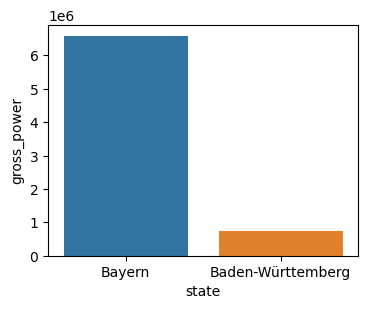

In [13]:
plt.figure(figsize=(4,3))
sns.barplot(x='state', y='gross_power', data=cleaned_data_df, ci=None, estimator=sum)
plt.show()

#### - Top 5 Location to consume Energy in each state

In [14]:
# bayern_state = cleaned_data_df[cleaned_data_df["state"] == "Bayern"]
top_locations = cleaned_data_df[cleaned_data_df["state"] == "Bayern"].groupby(["location"])["gross_power"].sum().reset_index()
top_locations = top_locations.sort_values(["gross_power"], ascending=False)
top_ten_bayern = top_locations[:10]

<AxesSubplot:xlabel='location', ylabel='gross_power'>

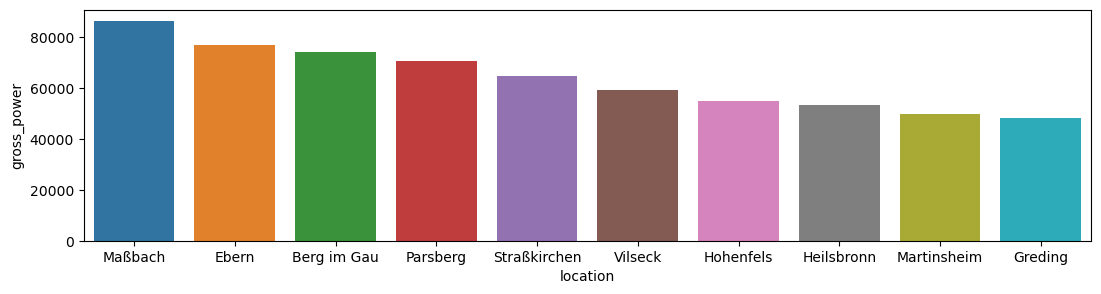

In [15]:
plt.figure(figsize=(13,3))
sns.barplot(x='location', y='gross_power', data=top_ten_bayern, ci=None)

In [16]:
top_locations = cleaned_data_df[cleaned_data_df["state"] == "Baden-Württemberg"].groupby(
    ["location"]
)["gross_power"].sum().reset_index()
top_locations = top_locations.sort_values(["gross_power"], ascending=False)
top_ten_baden = top_locations[:10]

<AxesSubplot:xlabel='location', ylabel='gross_power'>

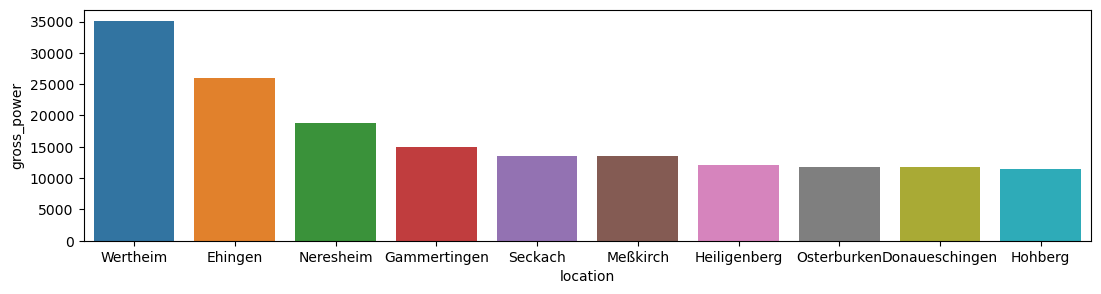

In [17]:
plt.figure(figsize=(13,3))
sns.barplot(x='location', y='gross_power', data=top_ten_baden, ci=None)

### GeoPandas

In [ ]:
df.dropna(subset=['latitude', 'longitude'])

In [ ]:
fp = "geomap/vg2500_bld.shp"
map_df = gpd.read_file(fp)
map_df.plot()

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.plot(ax=ax)
for idx, row in map_df.iterrows():
    if row['GEN'] == "Baden-Württemberg" or row['GEN'] == "Bayern":
        plt.annotate(s=row['GEN'], xy=row['coords'], horizontalalignment='center')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

In [ ]:
map_df.head()

In [ ]:
# Merge dataset with only our states

merged_gdf = map_df.set_index('GEN').join(cleaned_data_df.set_index('state'))

merged_gdf

In [ ]:
aggregated_gross_power = cleaned_data_df.groupby('state')['gross_power'].sum() / 1000000

In [ ]:
geo_df_for_power_analysis = pd.DataFrame(merged_gdf['geometry'].apply(lambda x: x.representative_point().coords[:]))
#geo_df_for_power_analysis = [coords[0] for coords in merged_gdf['coords']]




In [ ]:
geo_df_for_power_analysis

In [ ]:
column = cleaned_data_df['gross_power']
max_power = column.max()
vmin, vmax = 0, max_power
merged_gdf['coords'] = merged_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_gdf['coords'] = [coords[0] for coords in merged_gdf['coords']]
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged_gdf.plot(column='gross_power', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
for idx, row in merged_gdf.iterrows():

    plt.annotate(s=row['gross_power'], xy=row['coords'],
    horizontalalignment='center',fontsize=8)
    # remove the axis
    ax.axis('off')
    # add a title
    ax.set_title('Gross power generated for each state', \
    fontdict={'fontsize': '18',
    'fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    fig.savefig('testmap_1.png', dpi=300)